In [16]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [17]:
class Handmade_NSFD():
    def __init__(self, m, l, k, delta, alpha, h, time_units, choice):
        self.m          = m
        self.l          = l
        self.k          = k
        self.delta      = delta
        self.alpha      = alpha
        self.h          = h
        self.time_units = time_units
        self.choice     = choice
        
    def input_parameters(self, choice):
#         m     = 2500
#         l     = 6
#         k     = 1000
#         delta = 0.01
        
        if(choice == 'm'.casefold()):
            m = int(input('Masukan massa jembatan yang baru: '))
            return m, self.l, self.k, self.delta
        
        elif(choice == 'l'.casefold()):
            l = int(input('Masukkan lebar jembatan yang baru: '))
            return self.m, l, self.k, self.delta
        
        elif(choice == 'k'.casefold()):
            k = int(input('Masukkan nilai konstanta pegas yang baru: '))
            return self.m, self.l, k, self.delta
        
        elif(choice == 'delta'.casefold()):
            delta = float(input('Masukkan nilai konstanta peredam pegas yang baru: '))
            return self.m, self.l, self.k, delta
        
        else:
            return -1
        
    def print_parameters(self, u, ivp):
        m, l, k, delta = u
        theta_0, v_0, y_0, w_0 = ivp
        
        print('PARAMETERS')
        print('==========')
        print('m = {}'.format(m))
        print('l = {}'.format(l))
        print('k = {}'.format(k))
        print('delta = {}'.format(delta))
        print('alpha = {}'.format(self.alpha))
        print('h = {}'.format(self.h))
        print('time_units = {}'.format(self.time_units))
        
        print('IVP')
        print('===')
        print('theta = {}'.format(theta_0))
        print('v = {}'.format(v_0))
        print('y = {}'.format(y_0))
        print('w = {}'.format(w_0))
                
    def f_x(self, x): 
        f = (k/self.alpha) * (math.exp(self.alpha*x) - 1)

        return f
    
    def external_force(self, x):
        return 11 * math.sin(3*x)
    
    def get_alpha_beta(self, alpha, k, m):
        new_alpha = -self.alpha/2

        diskriminan_1 = self.delta*2 - 8*k/m
        diskriminan_2 = self.delta*2 - 24*k/m

        if(diskriminan_1 < 0 and diskriminan_2 < 0):
            beta_1 = math.sqrt(-diskriminan_1)/2
            beta_2 = math.sqrt(-diskriminan_2)/2

        return new_alpha, beta_1, beta_2
    
    def get_phi(self, alpha, k, m, h):
        alpha, beta_1, beta_2 = self.get_alpha_beta(alpha, k, m)

        numer_1 = (beta_1 * (math.exp(2 * alpha * self.h) + 1 - 2 * math.exp(alpha * self.h) * math.cos(beta_1 * self.h)))
        denom_1 = ((alpha**2 + beta_1**2) * math.exp(alpha*self.h) * math.sin(beta_1*self.h))
        phi_1   = numer_1/denom_1

        numer_2 = (beta_2 * (math.exp(2 * alpha * self.h) + 1 - 2 * math.exp(alpha * self.h) * math.cos(beta_2 * self.h)))
        denom_2 = ((alpha**2 + beta_2**2) * math.exp(alpha*self.h) * math.sin(beta_2*self.h))
        phi_2   = numer_2/denom_2

        return min(phi_1, phi_2)
    
    def get_numeric_results(self, u, ivp):
        m, l, k, delta = u
        theta_0, v_0, y_0, w_0 = ivp
        
        li_y     = []
        li_w     = []
        li_theta = []
        li_v     = []
        li_h     = []

        loops = int(self.time_units / self.h)
        for i in range(loops):
            min_delta = delta * -1

            minus = y_0 - l * math.sin(theta_0)
            plus  = y_0 + l * math.sin(theta_0)

            f_min  = self.f_x(minus) - self.f_x(plus)
            f_plus = self.f_x(minus) + self.f_x(plus)

            ext    = self.external_force(self.h*i)
            cosine = math.cos(theta_0)
            phi    = self.get_phi(self.alpha, k, m, self.h)

            y     = (phi * w_0) + y_0
            w     = (phi * (min_delta * w_0 - f_plus/m + ext)) + w_0
            theta = (phi * v_0) + theta_0
            v     = (phi * (min_delta * v_0 + (3/(m*l)) * cosine * f_min)) + v_0

            li_y.append(y)
            li_w.append(w)
            li_theta.append(theta)
            li_v.append(v)
            li_h.append(self.h*i)

            y_0     = y
            w_0     = w
            theta_0 = theta
            v_0     = v
            
        return li_y, li_theta, li_h
    
    def plot_results(self, u):
        y, theta, h = u
        
        plt.figure(figsize = (16,8))
        
        if(self.choice == 'm'.casefold()):
            plt.title(
                'Gerakan Torsional menggunakan NSFD; {} = {}'\
                .format(self.choice, m), fontsize = 22
            )
        elif(self.choice == 'k'.casefold()):
            plt.title(
                'Gerakan Torsional menggunakan NSFD; {} = {}'\
                .format(self.choice, k), fontsize = 22
            )
        elif(self.choice == 'l'.casefold()):
            plt.title(
                'Gerakan Torsional menggunakan NSFD; {} = {}'\
                .format(self.choice, l), fontsize = 22
            )
        elif(self.choice == 'delta'.casefold()):
            plt.title(
                'Gerakan Torsional menggunakan NSFD; \u03B4 = {}'\
                .format(delta), fontsize = 22
            )
            
        plt.plot(h, theta)
        plt.xlabel('t', style = 'italic', fontsize = 16)
        plt.ylabel('$\u03B8$ in radians', fontsize = 16)
        plt.rc('font', size = 14)
        
        if(self.choice == 'm'.casefold()):
            plt.savefig(
                'D:/Skripsi/Draft/Eksperimen/NSFD/Torsional/m/Gerakan Torsional menggunakan Euler; {} = {}.png'\
                .format(self.choice, m)
            )
        elif(self.choice == 'k'.casefold()):
            plt.savefig(
                'D:/Skripsi/Draft/Eksperimen/NSFD/Torsional/k/Gerakan Torsional menggunakan Euler; {} = {}.png'\
                .format(self.choice, k)
            )
        elif(self.choice == 'l'.casefold()):
            plt.savefig(
                'D:/Skripsi/Draft/Eksperimen/NSFD/Torsional/l/Gerakan Torsional menggunakan Euler; {} = {}.png'\
                .format(self.choice, l)
            )
        elif(self.choice == 'delta'.casefold()):
            plt.savefig(
                'D:/Skripsi/Draft/Eksperimen/NSFD/Torsional/delta/Gerakan Torsional menggunakan Euler; \u03B4 = {}.png'\
                .format(delta)
            )
        
        plt.show()

        plt.figure(figsize = (16,8))
        
        if(self.choice == 'm'.casefold()):
            plt.title(
                'Gerakan Vertikal menggunakan NSFD; {} = {}'\
                .format(self.choice, m), fontsize = 22
            )
        elif(self.choice == 'k'.casefold()):
            plt.title(
                'Gerakan Vertikal menggunakan NSFD; {} = {}'\
                .format(self.choice, k), fontsize = 22
            )
        elif(self.choice == 'l'.casefold()):
            plt.title(
                'Gerakan Vertikal menggunakan NSFD; {} = {}'\
                .format(self.choice, l), fontsize = 22
            )
        elif(self.choice == 'delta'.casefold()):
            plt.title(
                'Gerakan Vertikal menggunakan NSFD; \u03B4 = {}'\
                .format(delta), fontsize = 22
            )
            
        plt.plot(h, y)
        plt.xlabel('t', style = 'italic', fontsize = 16)
        plt.ylabel('$y$ in meter(s)', fontsize = 16)
        plt.rc('font', size = 14)
        
        if(self.choice == 'm'.casefold()):
            plt.savefig(
                'D:/Skripsi/Draft/Eksperimen/NSFD/Vertikal/m/Gerakan Torsional menggunakan Euler; {} = {}.png'\
                .format(self.choice, m)
            )
        elif(self.choice == 'k'.casefold()):
            plt.savefig(
                'D:/Skripsi/Draft/Eksperimen/NSFD/Vertikal/k/Gerakan Torsional menggunakan Euler; {} = {}.png'\
                .format(self.choice, k)
            )
        elif(self.choice == 'l'.casefold()):
            plt.savefig(
                'D:/Skripsi/Draft/Eksperimen/NSFD/Vertikal/l/Gerakan Torsional menggunakan Euler; {} = {}.png'\
                .format(self.choice, l)
            )
        elif(self.choice == 'delta'.casefold()):
            plt.savefig(
                'D:/Skripsi/Draft/Eksperimen/NSFD/Vertikal/delta/Gerakan Torsional menggunakan Euler; \u03B4 = {}.png'\
                .format(delta)
            )
        
        plt.show()

# Experiment 1 : `m`

Masukkan parameter yang ingin di-eksperimen: m
Masukan massa jembatan yang baru: 1500


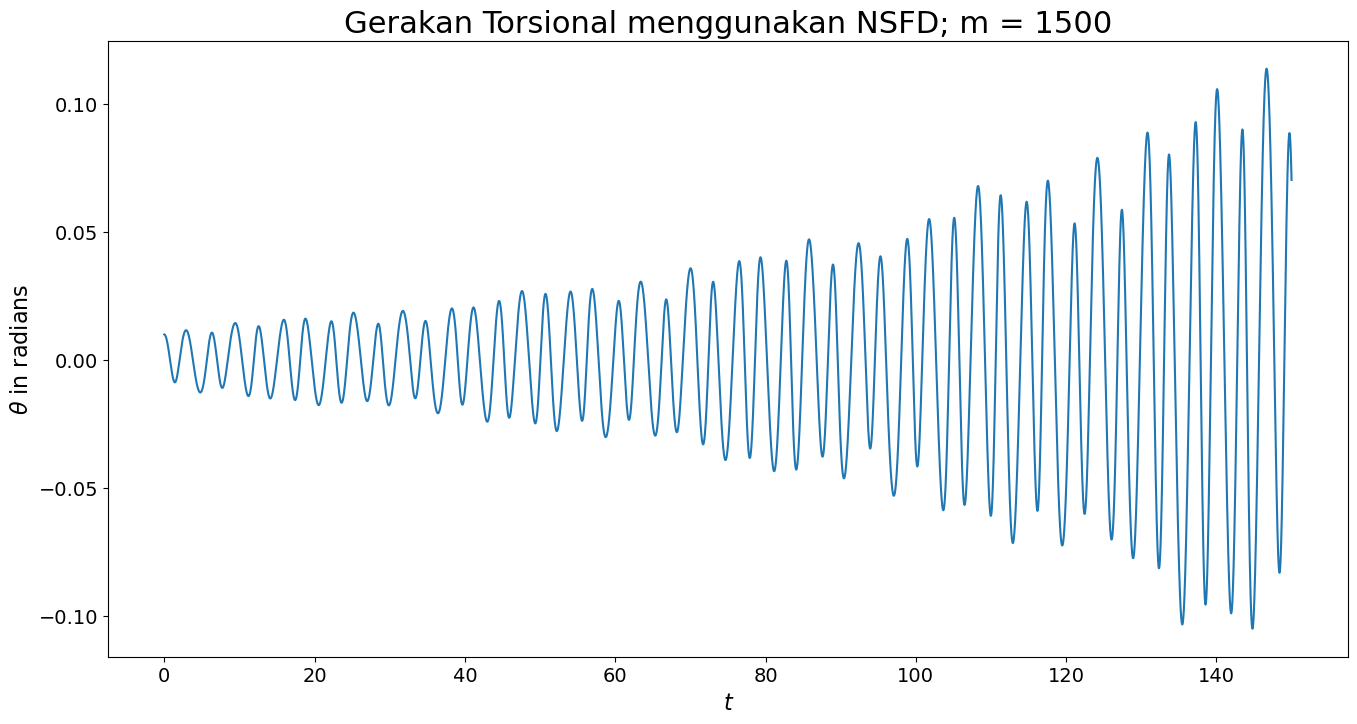

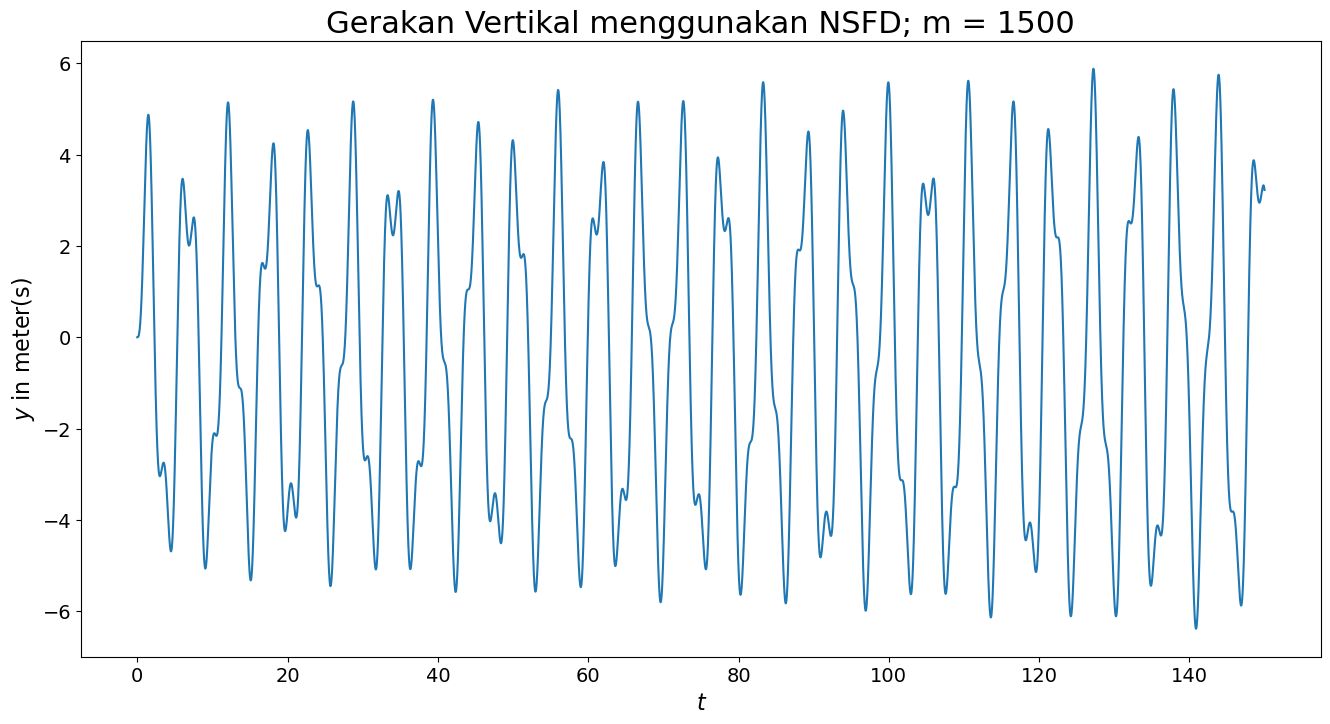

Masukan massa jembatan yang baru: 2500


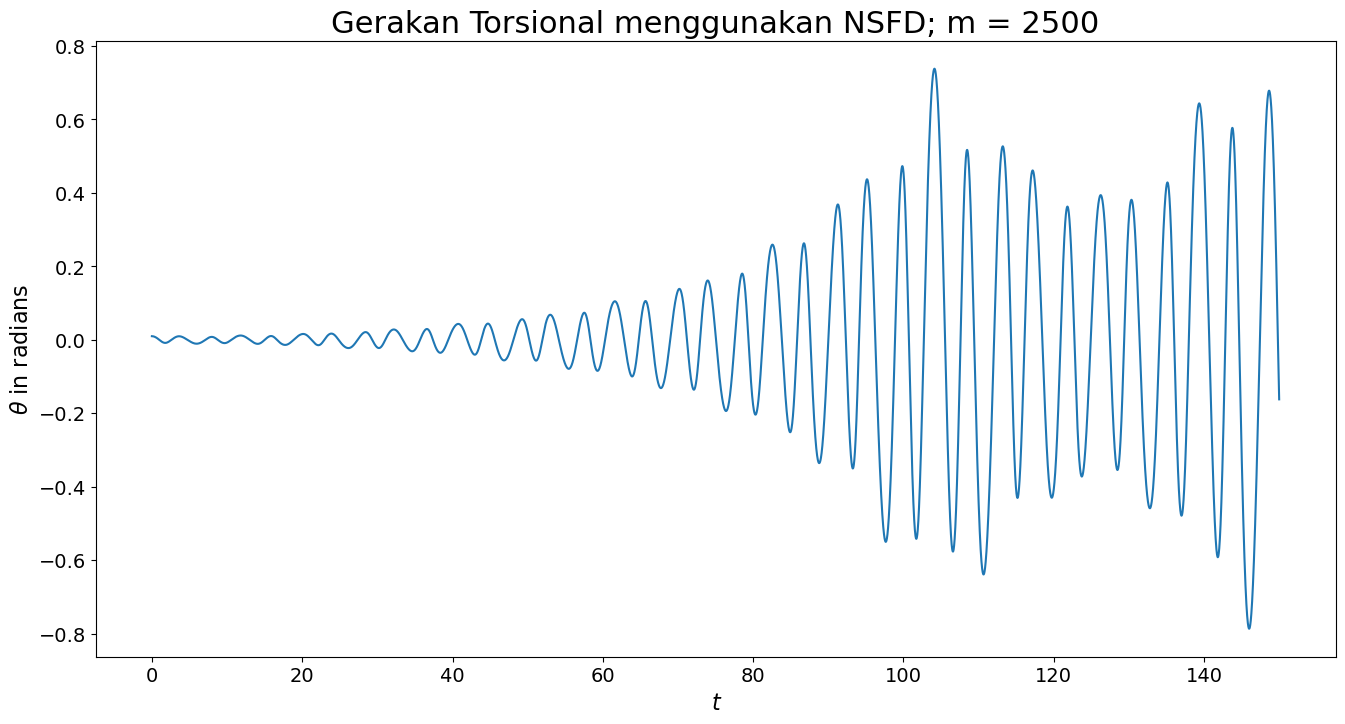

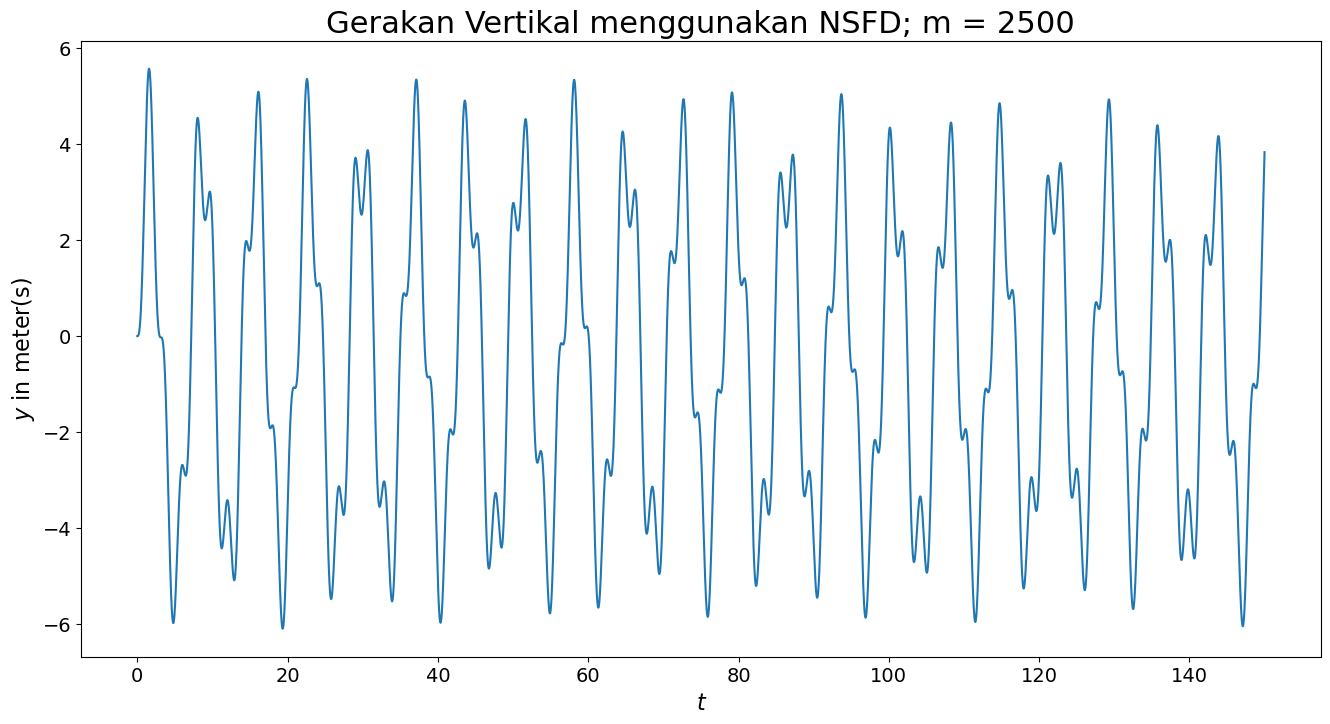

Masukan massa jembatan yang baru: 3500


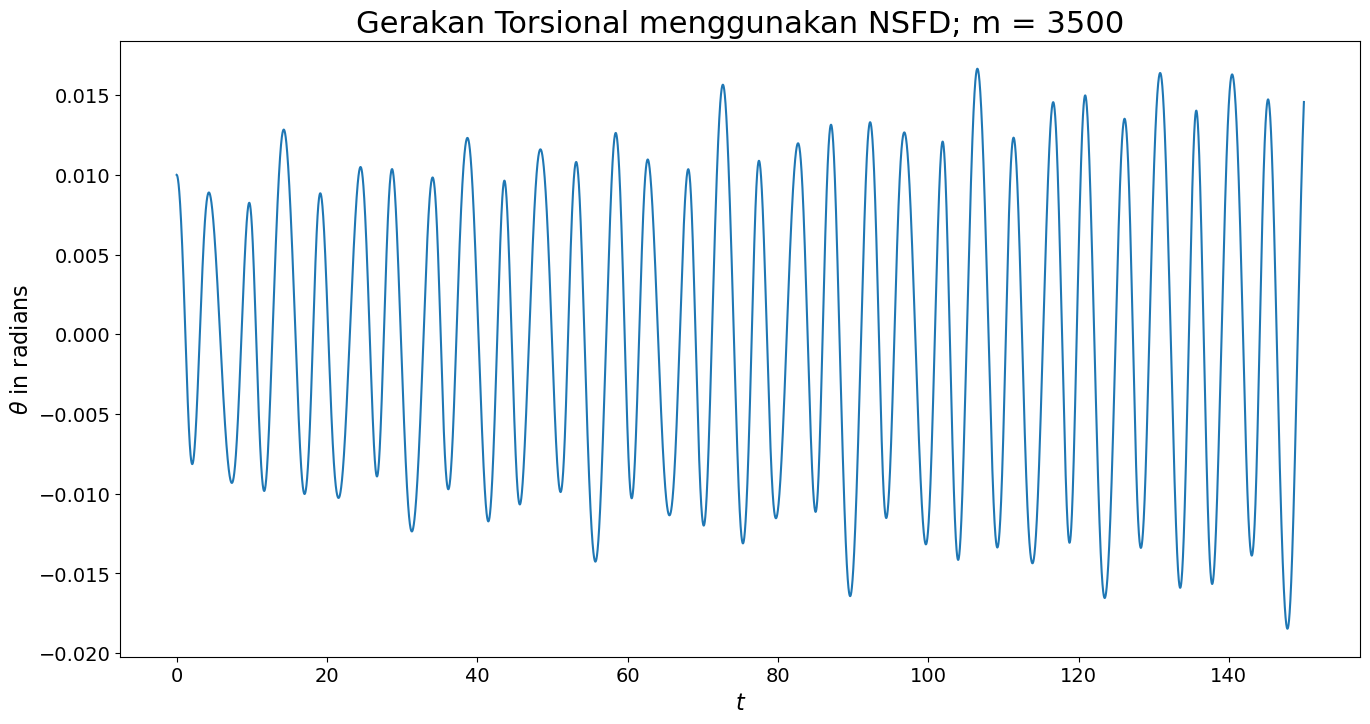

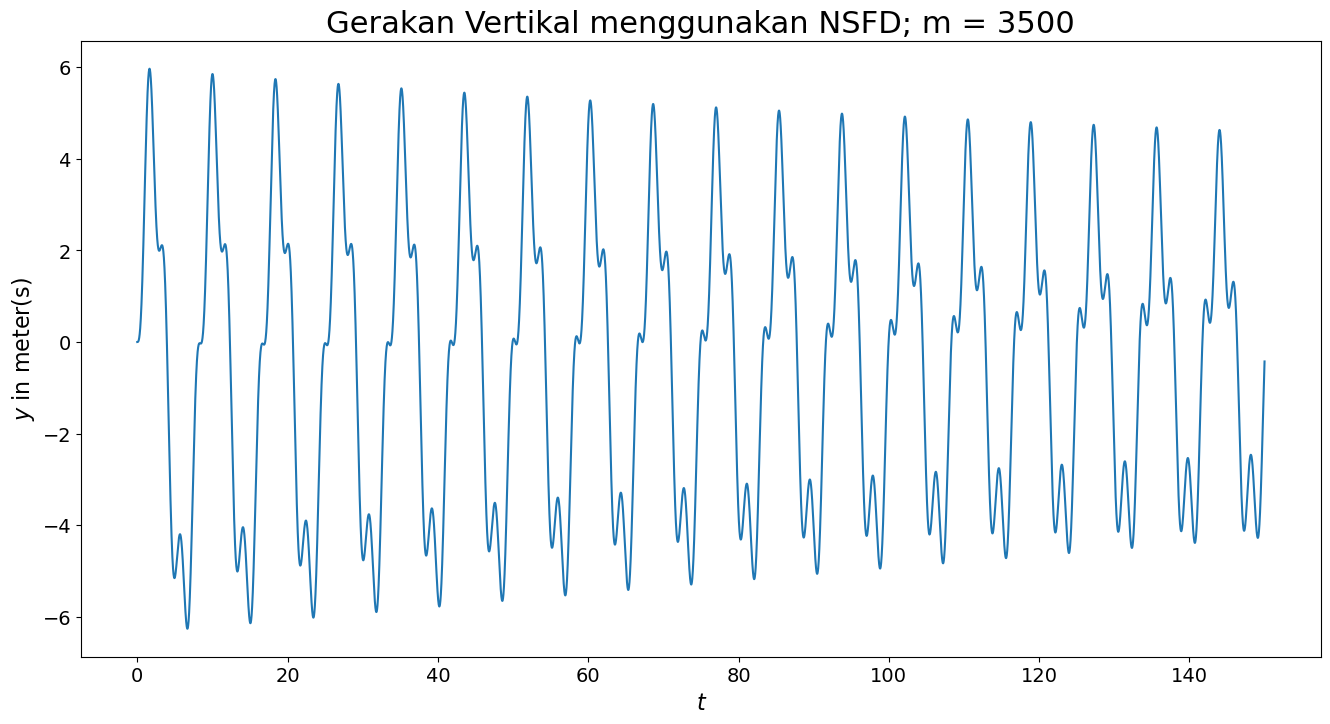

In [18]:
choice = input('Masukkan parameter yang ingin di-eksperimen: ')

experiment = Handmade_NSFD(
    m = 2500, 
    l = 6, 
    k = 1000, 
    delta = 0.01, 
    alpha = 0.1, 
    h = 0.01, 
    time_units = 150,
    choice = choice
)

for i in range(3):
    res = experiment.input_parameters(choice)

    if(isinstance(res, int) == True):
        print('Masukkan angka!')
    else:
        m     = res[0]
        l     = res[1]
        k     = res[2]
        delta = res[3]

    y, theta, h = experiment.get_numeric_results(
        u = (m, l, k, delta),
        ivp = (0.01, 0, 0, 0)
    )
    
    experiment.plot_results((y, theta, h))

# Experiment 2 : `l`

Masukkan parameter yang ingin di-eksperimen: l
Masukkan lebar jembatan yang baru: 6


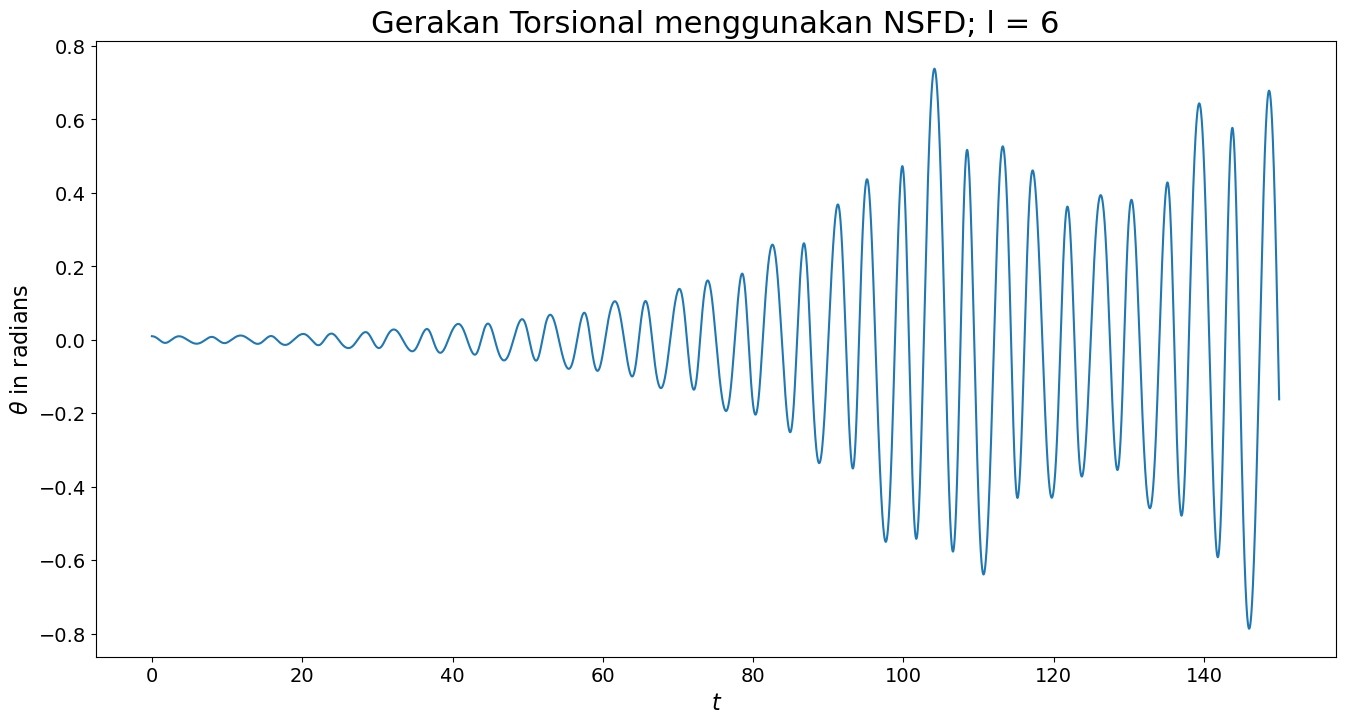

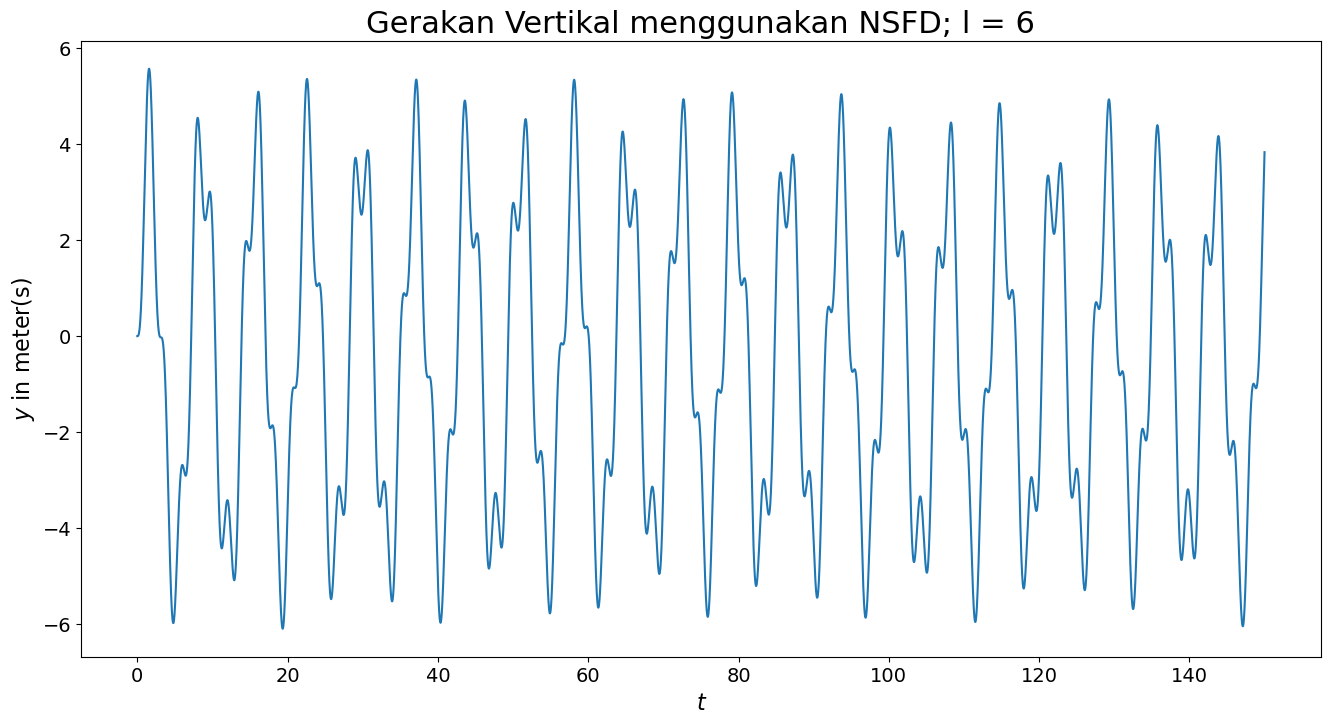

Masukkan lebar jembatan yang baru: 12


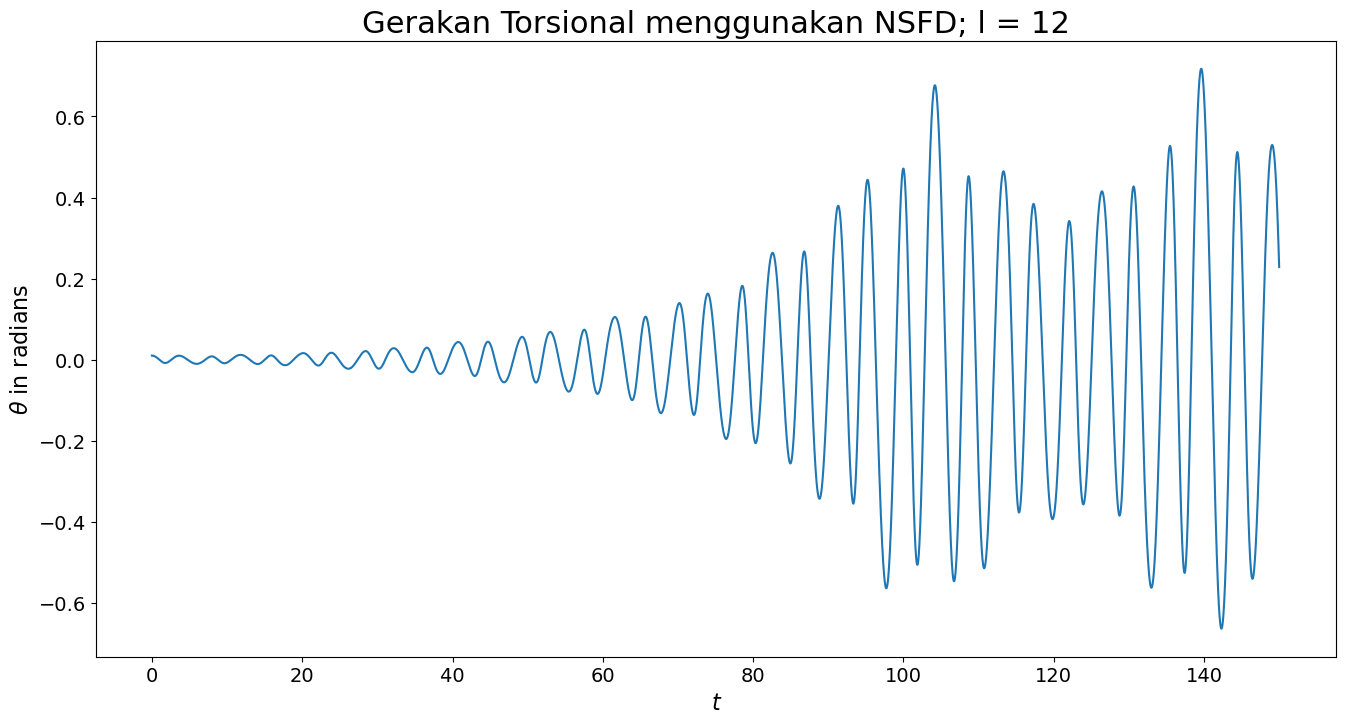

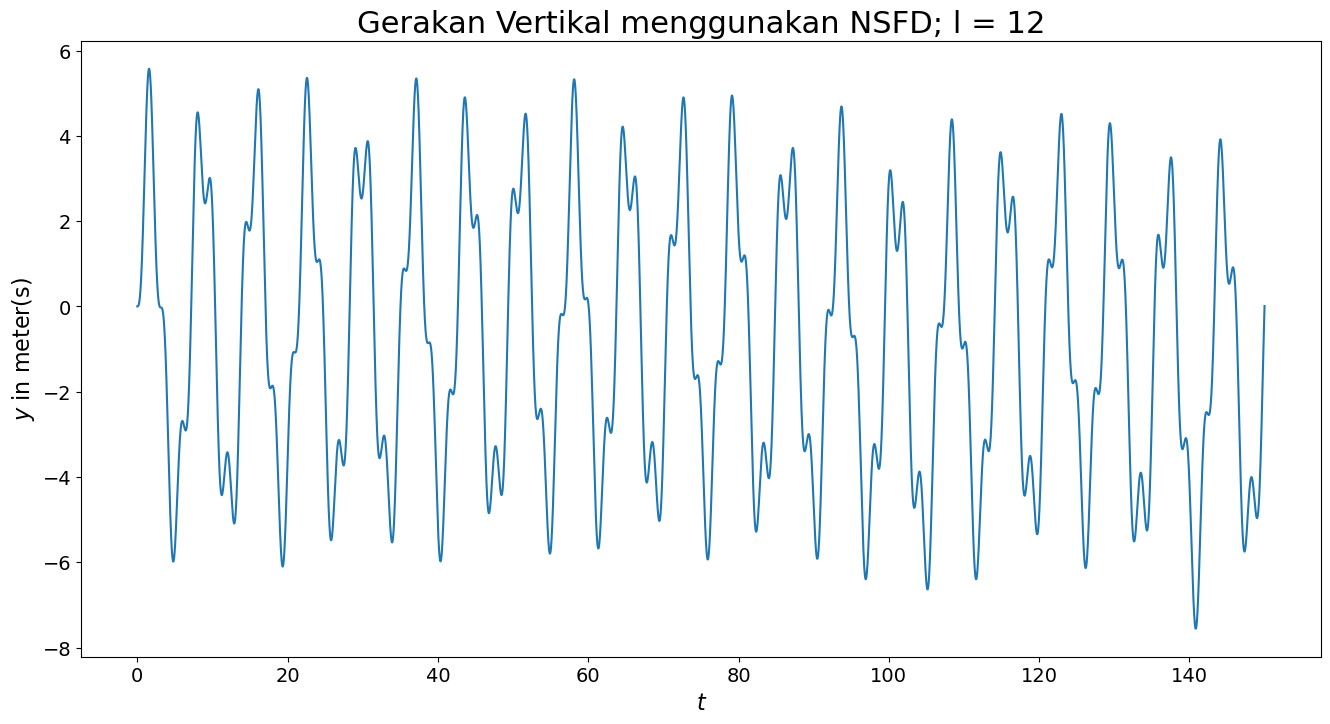

Masukkan lebar jembatan yang baru: 24


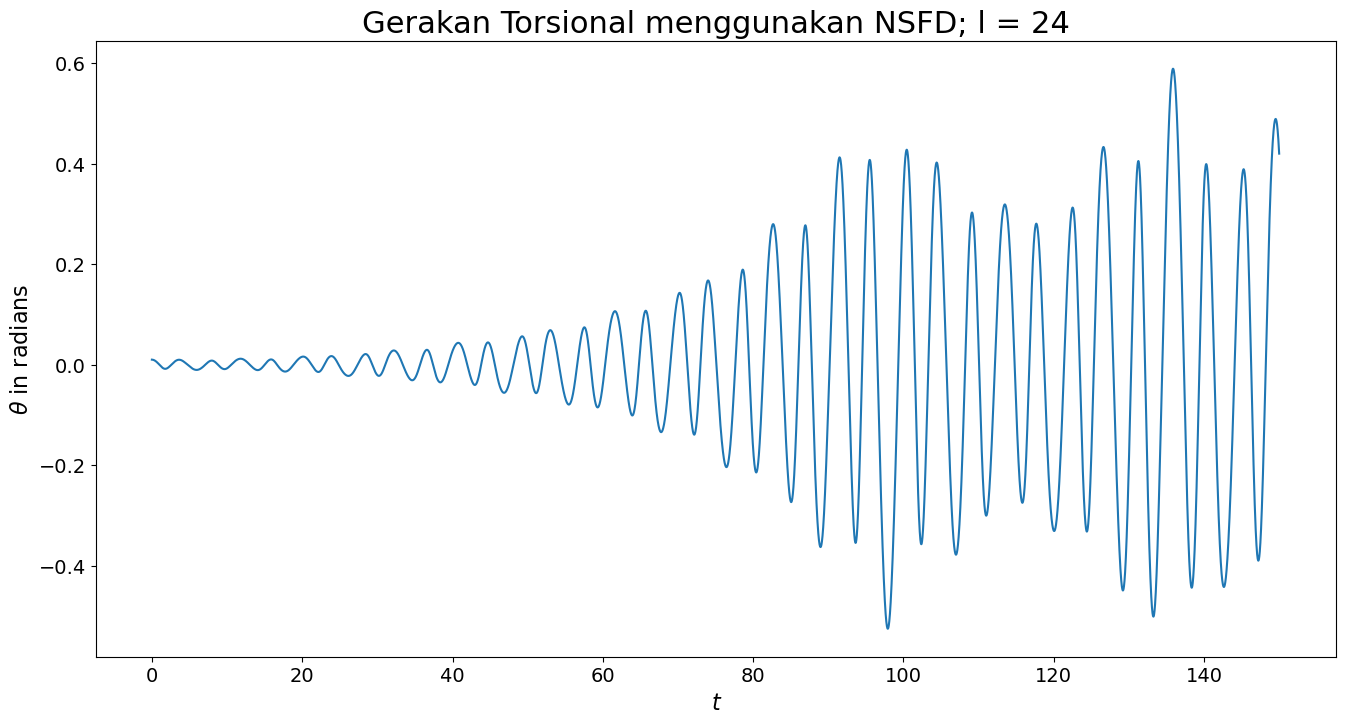

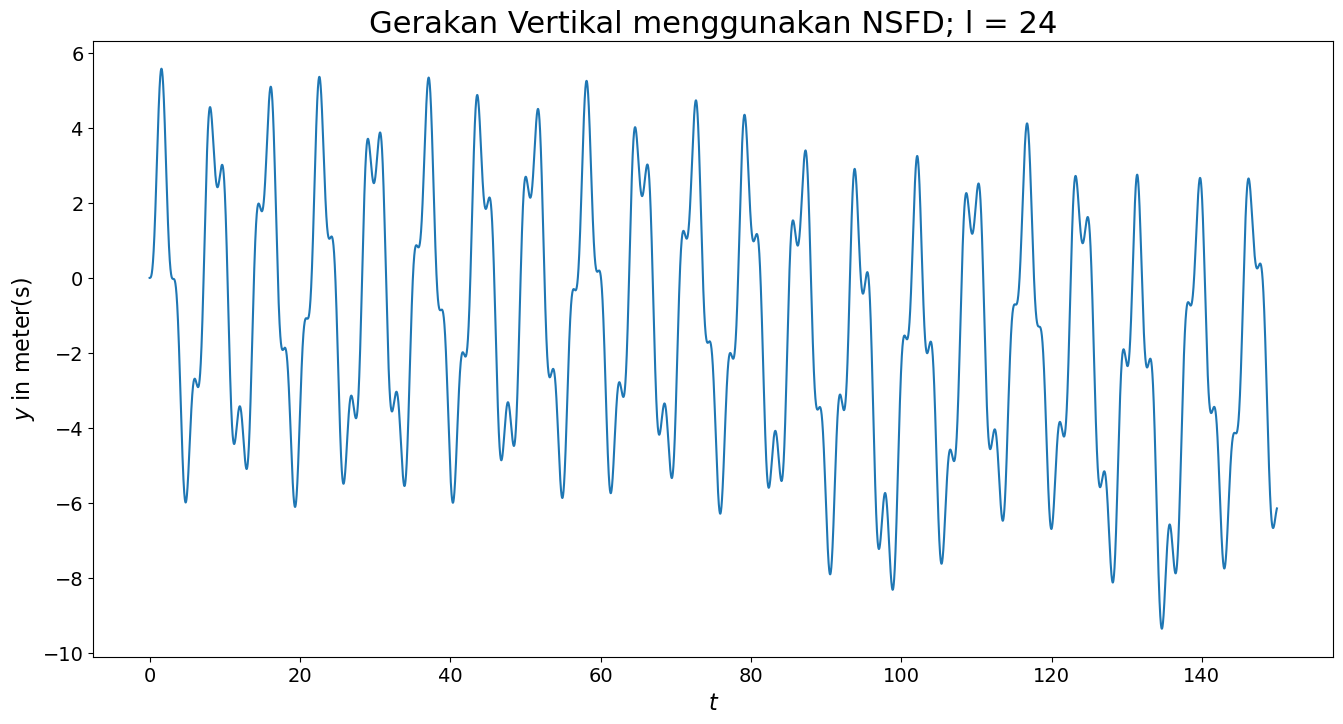

In [19]:
choice = input('Masukkan parameter yang ingin di-eksperimen: ')

experiment = Handmade_NSFD(
    m = 2500, 
    l = 6, 
    k = 1000, 
    delta = 0.01, 
    alpha = 0.1, 
    h = 0.01, 
    time_units = 150,
    choice = choice
)

for i in range(3):
    res = experiment.input_parameters(choice)

    if(isinstance(res, int) == True):
        print('Masukkan angka!')
    else:
        m     = res[0]
        l     = res[1]
        k     = res[2]
        delta = res[3]

    y, theta, h = experiment.get_numeric_results(
        u = (m, l, k, delta),
        ivp = (0.01, 0, 0, 0)
    )
    
    experiment.plot_results((y, theta, h))

# Experiment 3 : `k`

Masukkan parameter yang ingin di-eksperimen: k
Masukkan nilai konstanta pegas yang baru: 500
PARAMETERS
m = 2500
l = 6
k = 500
delta = 0.01
alpha = 0.1
h = 0.01
time_units = 150
IVP
===
theta = 0.01
v = 0
y = 0
w = 0


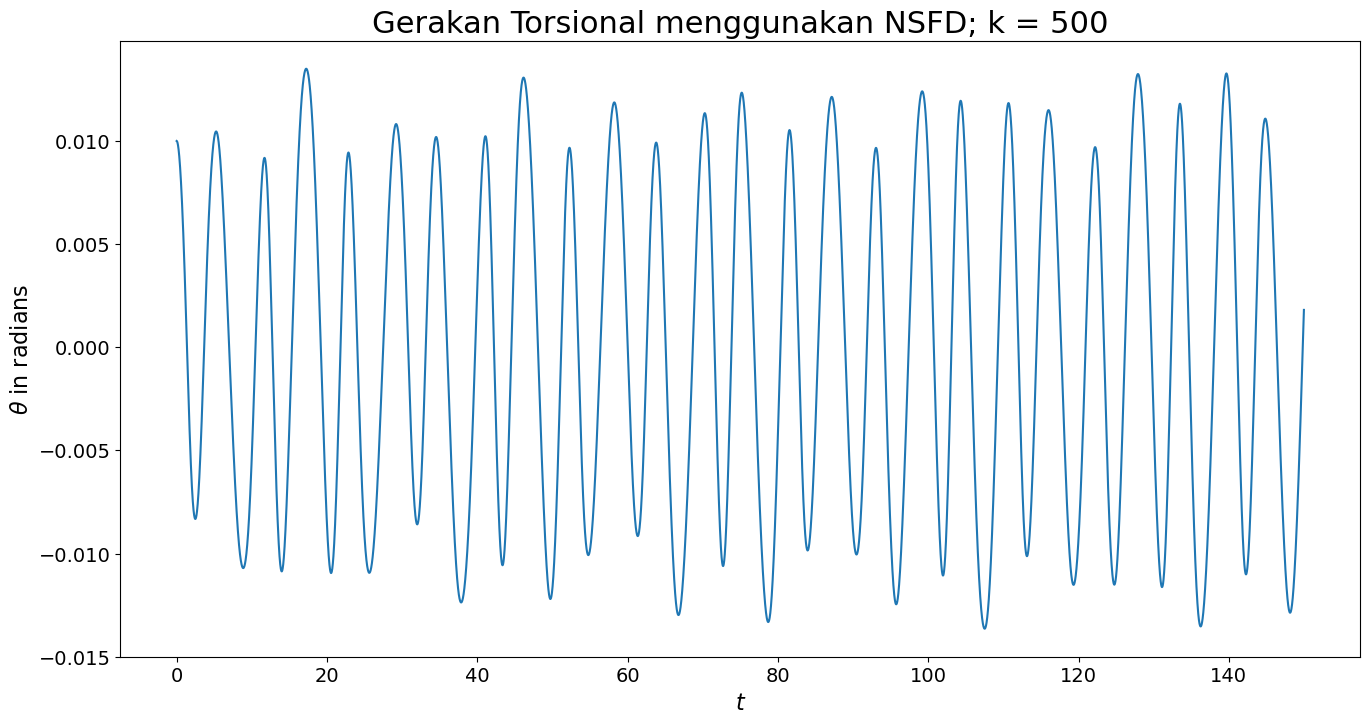

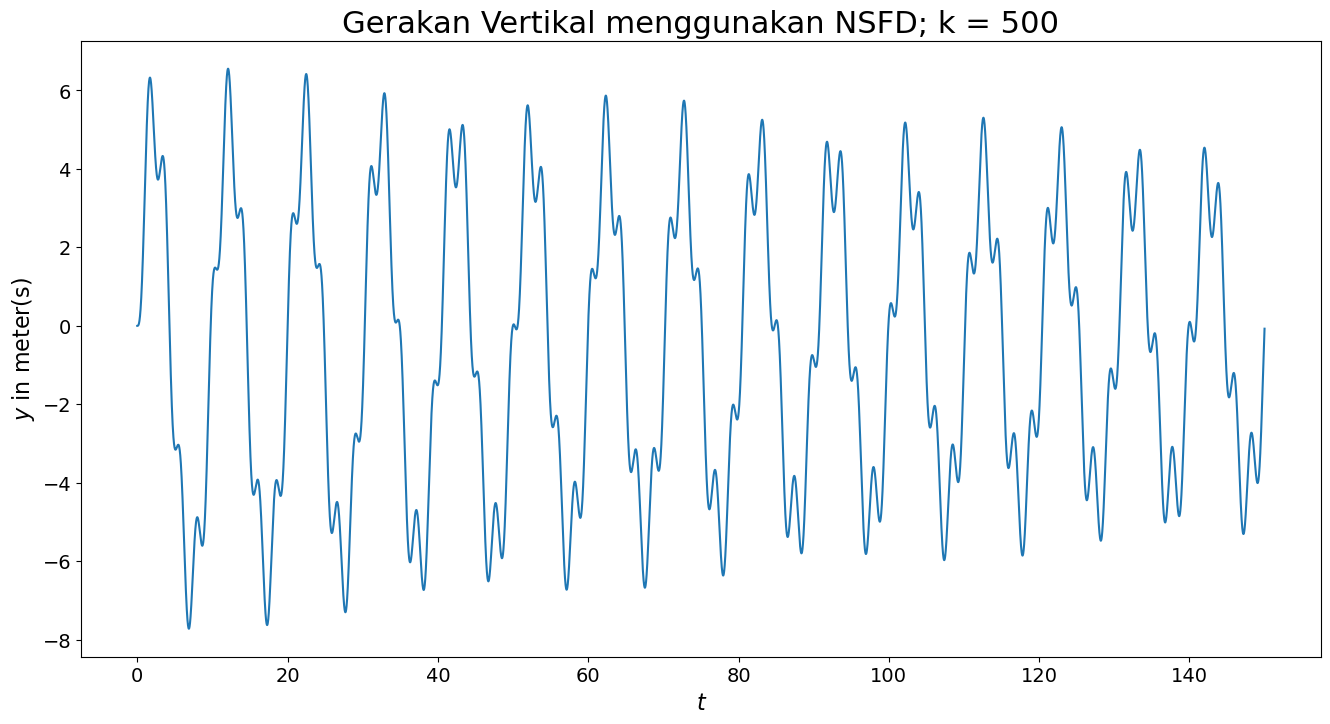

Masukkan nilai konstanta pegas yang baru: 1000
PARAMETERS
m = 2500
l = 6
k = 1000
delta = 0.01
alpha = 0.1
h = 0.01
time_units = 150
IVP
===
theta = 0.01
v = 0
y = 0
w = 0


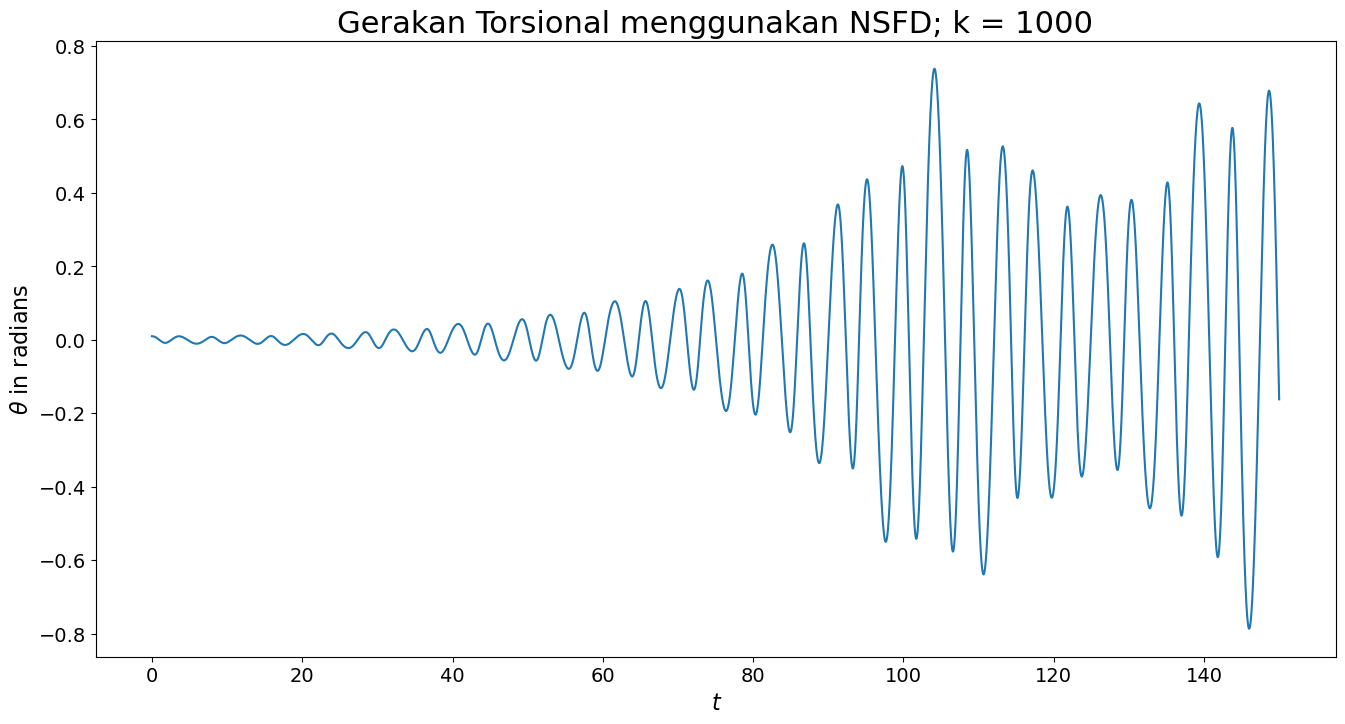

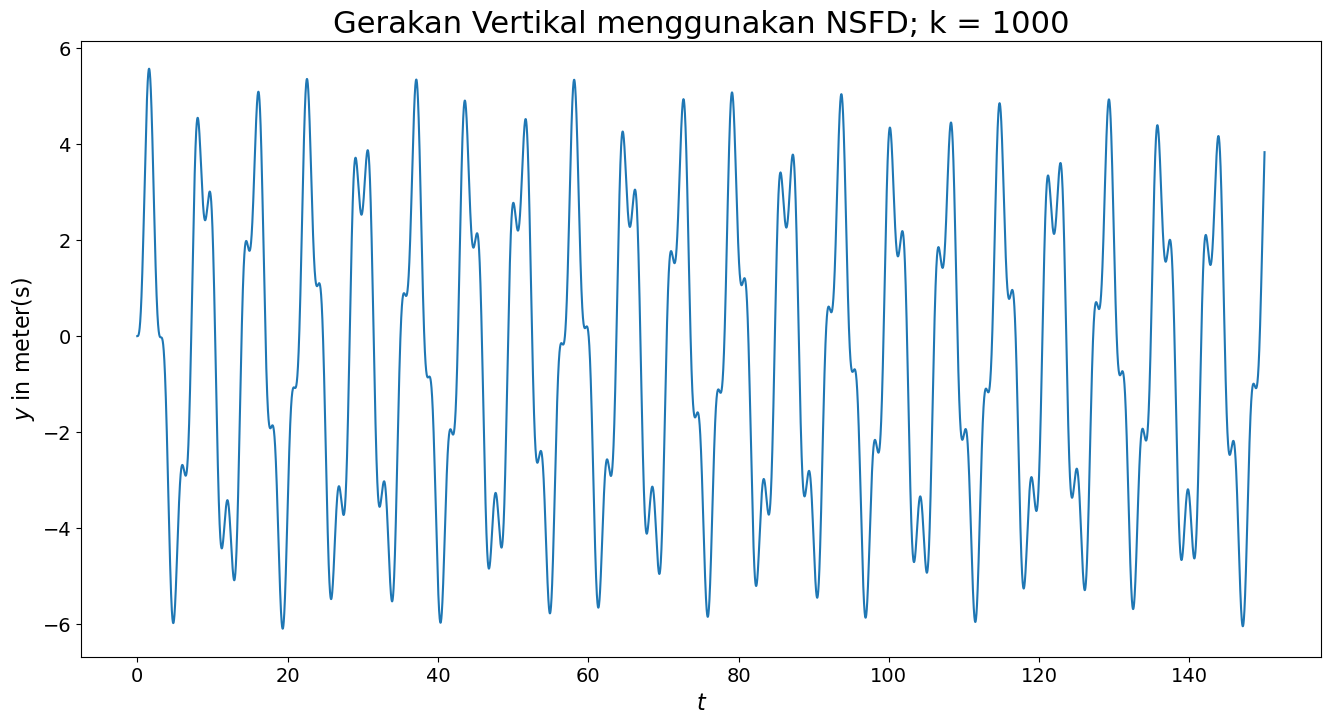

Masukkan nilai konstanta pegas yang baru: 2000
PARAMETERS
m = 2500
l = 6
k = 2000
delta = 0.01
alpha = 0.1
h = 0.01
time_units = 150
IVP
===
theta = 0.01
v = 0
y = 0
w = 0


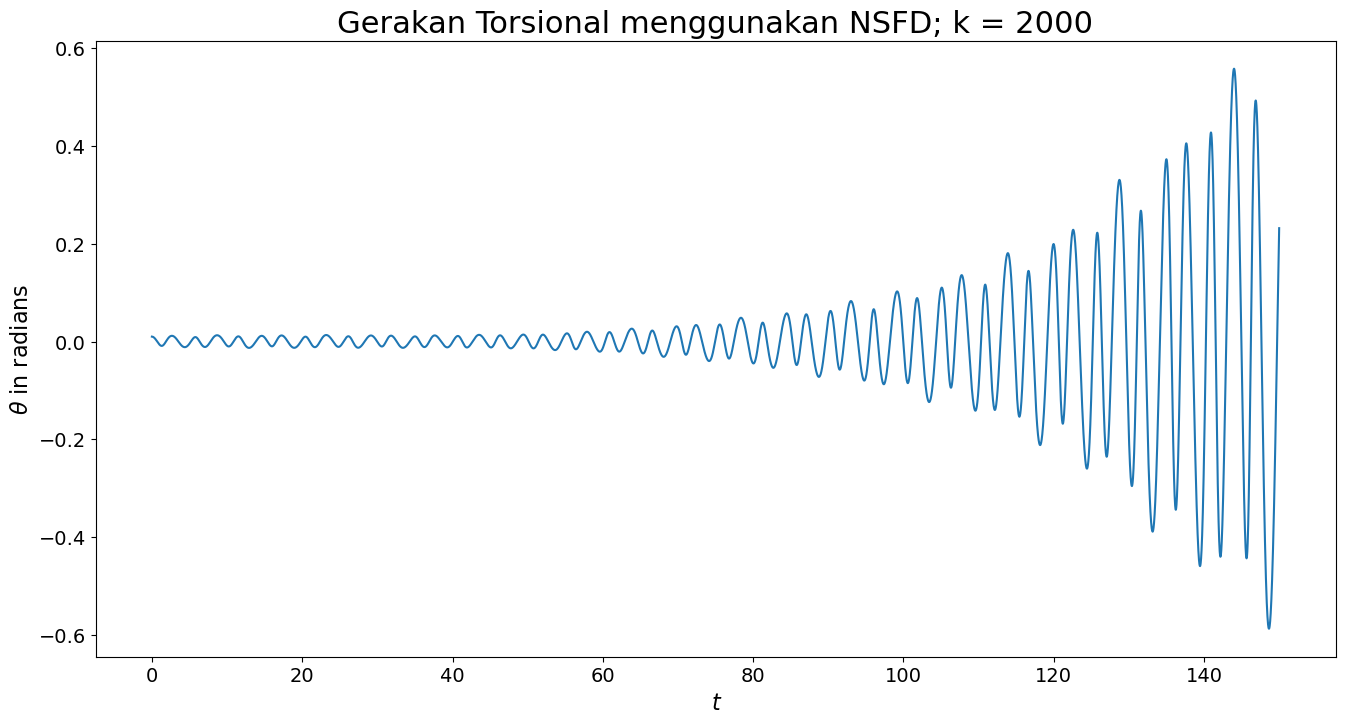

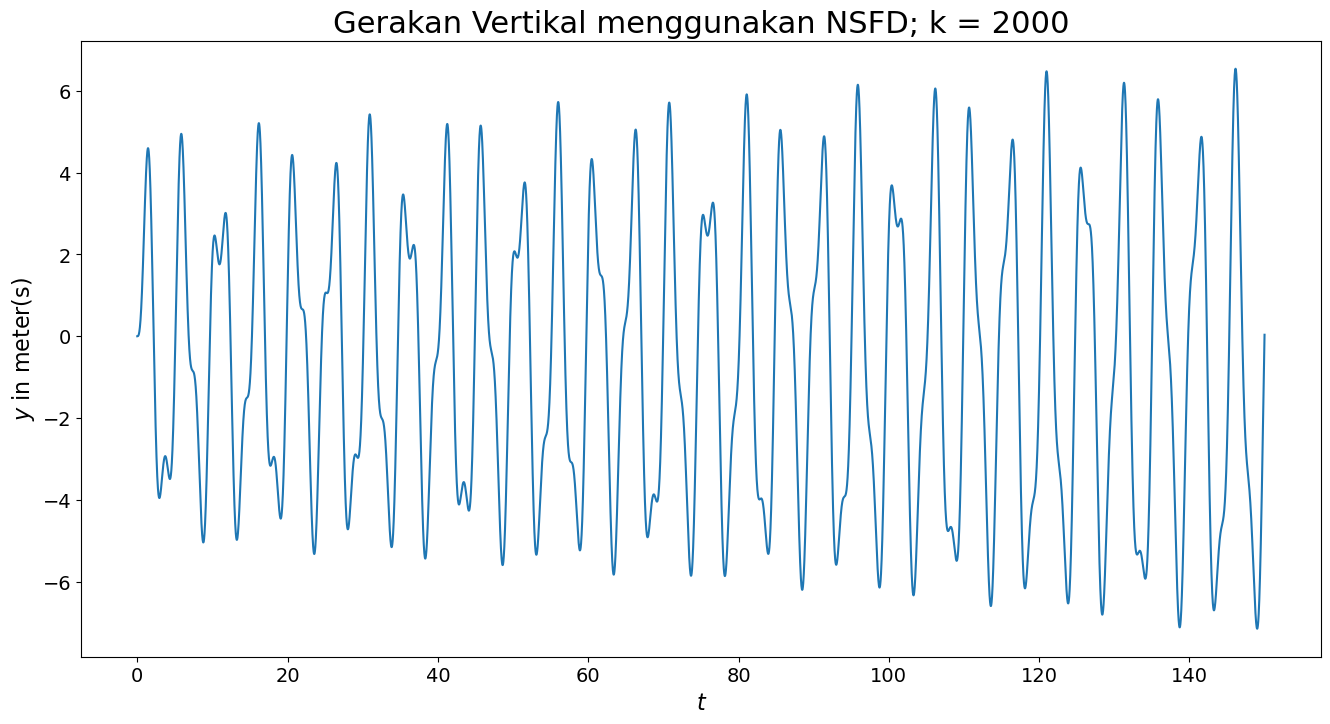

In [20]:
choice = input('Masukkan parameter yang ingin di-eksperimen: ')

experiment = Handmade_NSFD(
    m = 2500, 
    l = 6, 
    k = 1000, 
    delta = 0.01, 
    alpha = 0.1, 
    h = 0.01, 
    time_units = 150,
    choice = choice
)

for i in range(3):
    res = experiment.input_parameters(choice)

    if(isinstance(res, int) == True):
        print('Masukkan angka!')
    else:
        m     = res[0]
        l     = res[1]
        k     = res[2]
        delta = res[3]
        
    experiment.print_parameters(
        u = (m, l, k, delta),
        ivp = (0.01, 0, 0, 0)
    )

    y, theta, h = experiment.get_numeric_results(
        u = (m, l, k, delta),
        ivp = (0.01, 0, 0, 0)
    )
    
    experiment.plot_results((y, theta, h))

# Experiment 4 : `delta`

Masukkan parameter yang ingin di-eksperimen: delta
Masukkan nilai konstanta peredam pegas yang baru: 0.01


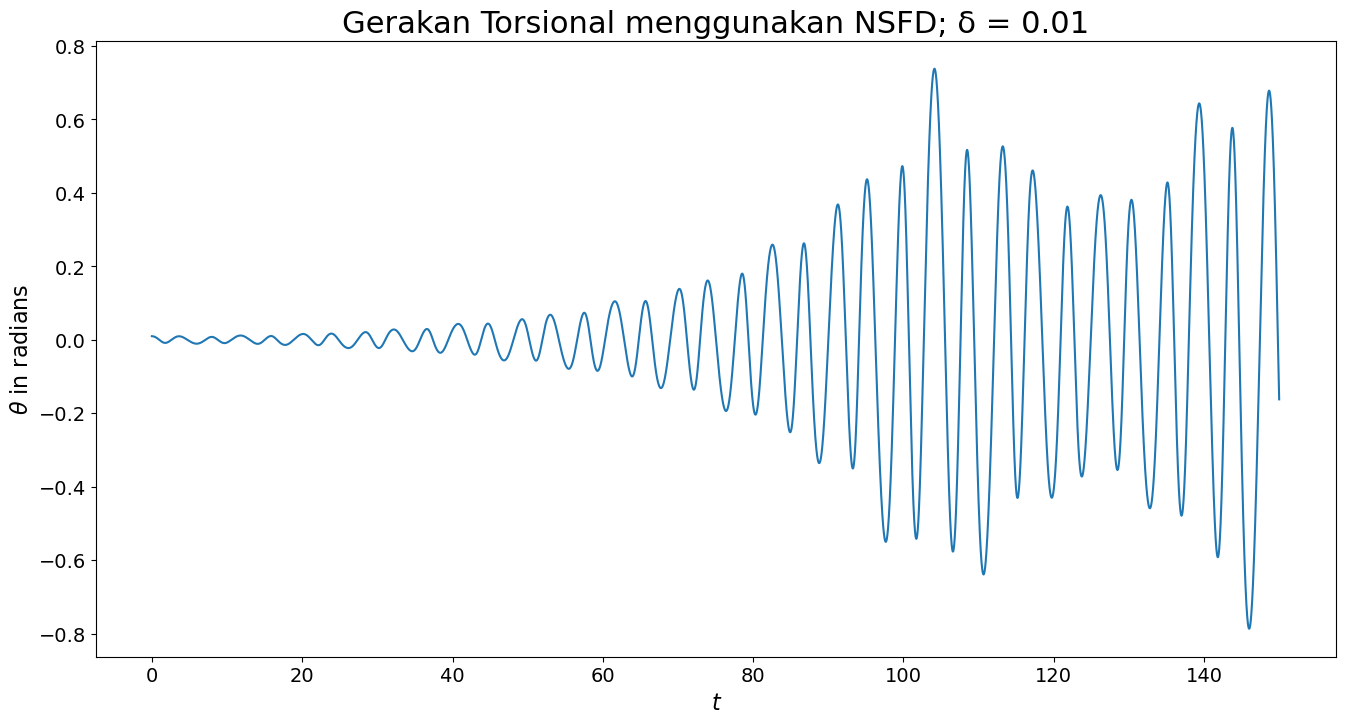

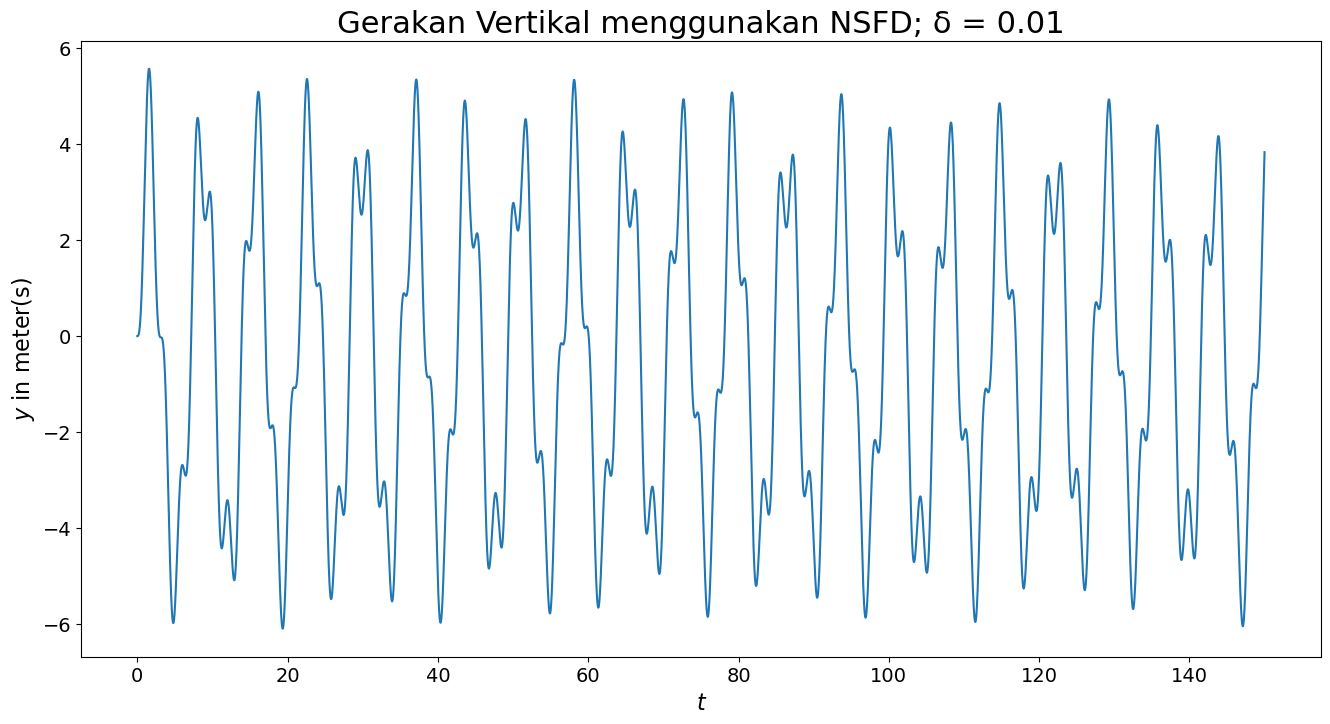

Masukkan nilai konstanta peredam pegas yang baru: 1


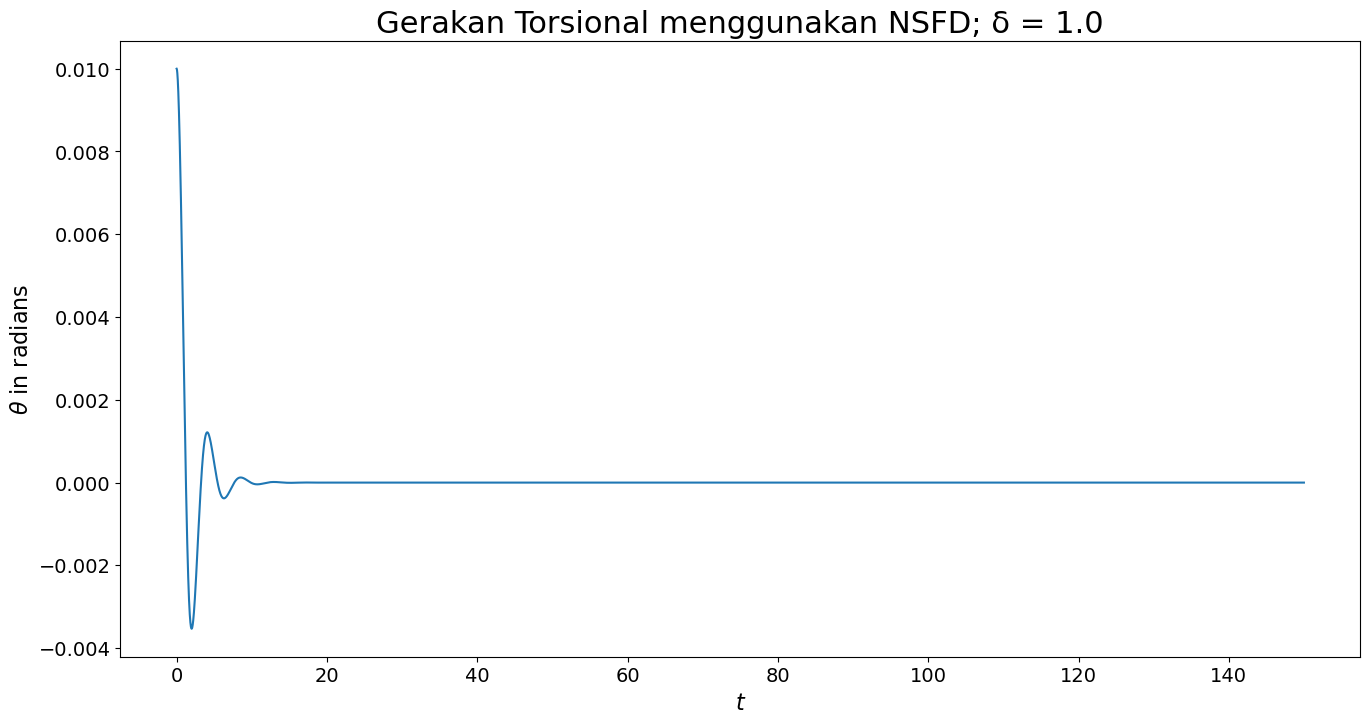

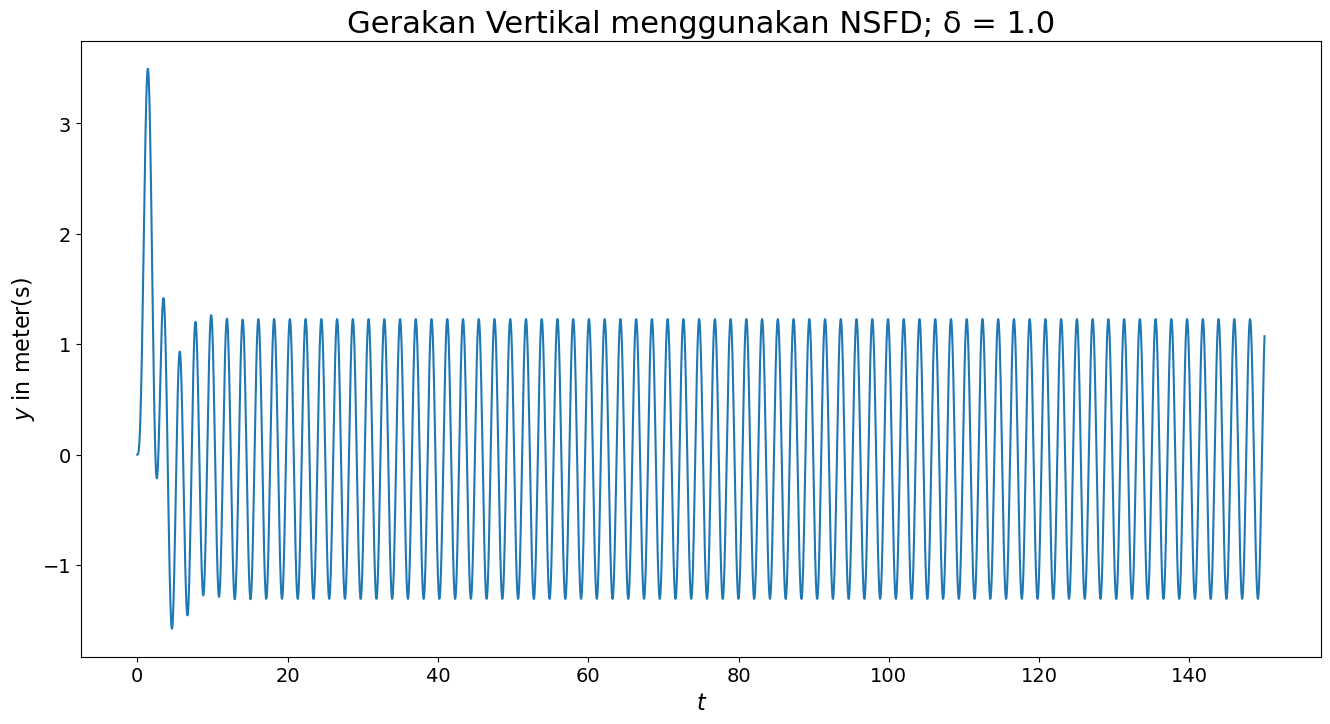

In [23]:
choice = input('Masukkan parameter yang ingin di-eksperimen: ')

experiment = Handmade_NSFD(
    m = 2500, 
    l = 6, 
    k = 1000, 
    delta = 0.01, 
    alpha = 0.1, 
    h = 0.01, 
    time_units = 150,
    choice = choice
)

for i in range(2):
    res = experiment.input_parameters(choice)

    if(isinstance(res, int) == True):
        print('Masukkan angka!')
    else:
        m     = res[0]
        l     = res[1]
        k     = res[2]
        delta = res[3]

    y, theta, h = experiment.get_numeric_results(
        u = (m, l, k, delta),
        ivp = (0.01, 0, 0, 0)
    )
    
    experiment.plot_results((y, theta, h))